In [2]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.3.1%2Bcu118-cp38-cp38-win_amd64.whl (2673.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.18.1%2Bcu118-cp38-cp38-win_amd64.whl (4.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.3.1%2Bcu118-cp38-cp38-win_amd64.whl (4.0 MB)
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl (11 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached https://download.pytorch.org/whl/networkx-3.2.1-py3-none-any.whl (1.6 MB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.3-py3-none-any.whl (133 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.2.0-py3-none-any.whl (170 kB)
  Using cached https://download.pytorch.org/whl/mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
  Using cached https://download.pytorch.org/whl/numpy-1.24.1-cp38-

In [6]:
pip install pandas

  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import torch.nn as nn
import pandas as pd
import torch

In [8]:
torch.cuda.is_available()

True

In [4]:
os.listdir('data/clotho-aqa')

['audio_files',
 'clotho_aqa_metadata.csv',
 'clotho_aqa_test.csv',
 'clotho_aqa_train.csv',
 'clotho_aqa_val.csv',
 'LICENSE.txt']

In [9]:
train_labels = pd.read_csv('data/clotho-aqa/clotho_aqa_train.csv').head()

In [10]:
#  removing the confidence column from the csv
train_labels = train_labels.drop(columns=['confidence'])



In [11]:
train_labels

,file_name,QuestionText,answer
0,AmbianceBackyard_Quiet_bip.wav,Are there more than one bird squawking?,yes
1,AmbianceBackyard_Quiet_bip.wav,Are there more than one bird squawking?,yes
2,AmbianceBackyard_Quiet_bip.wav,Are there more than one bird squawking?,yes
3,AmbianceBackyard_Quiet_bip.wav,Are there people having a conversation?,no
4,AmbianceBackyard_Quiet_bip.wav,Are there people having a conversation?,no


In [13]:
audio_files = os.listdir('data/clotho-aqa/audio_files')

In [21]:
train_labels.iloc[0]['file_name']

'AmbianceBackyard_Quiet_bip.wav'

In [19]:
audio_files

['00214 supermarket entrance 1.wav',
 '005 - Opening a can of soup.wav',
 '005_musesdelight_charismatic-african-preacher.wav',
 '01 A pug struggles to breathe 1.14.2008.wav',
 '01 barreau bunker original.wav',
 '01 residential elevator with door open and close.wav',
 '01-31 Footsteps, Wood, Barefoot, Jumps &amp; Scuffs.wav',
 '01-bottle-water-sparkle.wav',
 '01058 main street walk.wav',
 '020220_00.wav',
 '0211_170236 walk downstairs.wav',
 '0221 Bar_terrace.wav',
 '0232 Street_birds_2.wav',
 '024_House_InsideCarEngineStart.wav',
 '02668 stripwood noises.wav',
 '0346 Traffic_at_Sindang.wav',
 '04-Bakken_GamblingMachines_Hall.wav',
 '0401 Traffic_light_sound.wav',
 '05 hn_PittsPennLincoln.wav',
 '05-Bakken_Distant-Ambience.wav',
 '05769 carpenter&#39;s workshop ambience.wav',
 '061215_chalice_well_cascade_okm2_t02eq.wav',
 '070821_flsp_bog01.wav',
 '070821_flsp_trail03.wav',
 '070821_flsp_trail05.wav',
 '07_Lanes_Island_Ambient2_44_16.wav',
 '08-Garage Opening-consolidated.wav',
 '08010

In [22]:
import torchaudio

In [31]:
waveform, sample_rate =torchaudio.load('data/clotho-aqa/audio_files/' + train_labels.iloc[0]['file_name'])

In [33]:
import torch

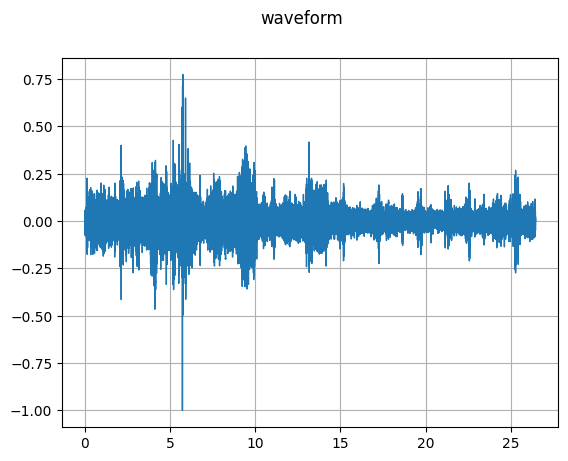

In [34]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

In [ ]:
plot_waveform(waveform, sample_rate)

In [35]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

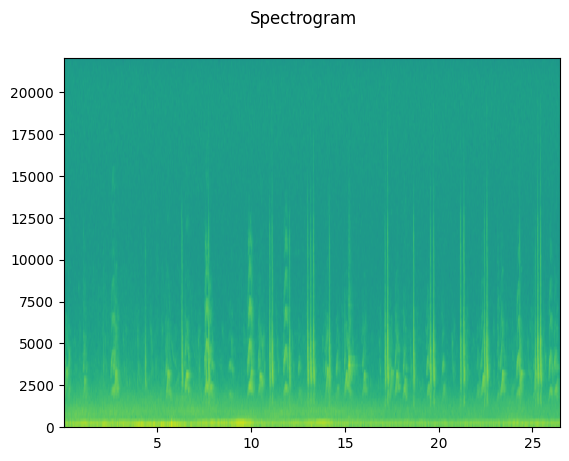

In [36]:
plot_specgram(waveform, sample_rate)

In [10]:
pip install msclap

  Using cached msclap-1.3.3-py3-none-any.whl.metadata (6.0 kB)
  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached numba-0.58.1-cp38-cp38-win_amd64.whl.metadata (2.8 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached torchlibrosa-0.1.0-py3-none-any.whl.metadata (3.5 kB)
  Using cached torchvision-0.16.2-cp38-cp38-win_amd64.whl.metadata (6.6 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached transformers-4.42.4-py3-none-any.whl.metadata (43 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.3.7-cp38-cp38-win_amd64.whl.metadata (5.7 kB)
  Using cached lazy_loader-0.4-py3-none-any

  You can safely remove it manually.


In [15]:
pip uninstall torchaudio==2.3.1+cu118

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
from lam import LAM

In [2]:
text = ["this is a music of india and it is very popular"]
audio_path = 'test_file.wav'
model = LAM()
hello = model(text, audio_path)
print(hello)

LibsndfileError: Error opening 't': System error.